<a href="https://colab.research.google.com/github/chitra-psg/lending-club/blob/master/customer_loan_profile_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the required modules
import pandas as pd
import seaborn as sns
import warnings


import matplotlib.pyplot as plt

In [2]:
# Configurations

sns.set_style('darkgrid')
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# The dataset has many columns and the list is getting truncated in the output. Hence, adjusting the configuration
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)

In [3]:
# Load the source data from GitHub into dataframe for analysis
# Load all column data in and then determine data type : low_memory=False
df_loan = pd.read_csv("https://github.com/chitra-psg/lending-club/blob/master/data/loan.csv?raw=True", low_memory=False)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Data Cleansing

Data has too many columns. We will shortlist columns based on the data availability in the columns and then perform analysis of the data to shortlist attributes further for our analysis

In [4]:
# Check if the columns have right data type to decide if any conversion required
df_loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [5]:
# Identify key columns for our analysis by identifying columns which dont have much useful data. 
# Columns which fall under below category can be excluded from our analysis
# Case 1 : Check for duplicates and resolve if any
# Case 2 : Handle columns with too many missing values
# Case 3 : Check if any column has redudant information by analysing the data
# Case 4 : Check for distribution of the values in each column to understand the usefulness of the columnn

In [6]:
# Case 1 : Check if Loan ID and Member ID are unique to identify if we have multiple loan details for single applicant
loan_unique_flag =  df_loan["id"].is_unique 
member_unique_flag =  df_loan["member_id"].is_unique 
print('Uniqueness of Loan ID is ' ,loan_unique_flag ,'\n', 'Uniqueness of Member ID is',member_unique_flag)

#No duplicates found so no action requried here

Uniqueness of Loan ID is  True 
 Uniqueness of Member ID is True


In [7]:
# Case 2 : Analyse missing values in all columns

# Calcualte missing values percentage for all columns
missing_value = round((df_loan.isnull().sum()/len(df_loan.index)) * 100, 1)

print('No. of columns  = ', missing_value.count())
print('No. of columns with missing values = ', missing_value[missing_value > 0].count())
print('No. of columns with more than 50% missing values = ', missing_value[missing_value > 50].count())

# Drop columns with more than 50% data missing
df_loan.drop(missing_value[ missing_value > 50 ].index, axis=1, inplace=True)

print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  111
No. of columns with missing values =  66
No. of columns with more than 50% missing values =  57
No. of columns after drop =  54


In [8]:
# Case 3 : Check the numeric data to see how how the data is distributed
# It still has too many numeric fields so will revisit

pd.options.display.float_format = '{:.2f}'.format
df_loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,39717.00,39717.00,39661.00,39717.00,39020.00,39678.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,1.00,0.00,0.00,0.00,0.04,0.00
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,0.00,0.00,0.00,0.00,0.20,0.00
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,1.00,0.00,0.00,0.00,0.00,0.00
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,1.00,0.00,0.00,0.00,0.00,0.00
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,1.00,0.00,0.00,0.00,0.00,0.00
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,1.00,0.00,0.00,0.00,2.00,0.00


In [9]:
# Case 3 : Check distinct values apart from Null in all columns

distinct_value = df_loan.nunique()
print('No. of columns  = ', distinct_value.count())
print('No. of columns with only one non NULL value = ', distinct_value[distinct_value ==1].count())

# Drop columns with just 1 non null value
df_loan.drop(distinct_value[ distinct_value == 1 ].index, axis=1, inplace=True)
print('No. of columns after drop = ', len(df_loan.columns))

No. of columns  =  54
No. of columns with only one non NULL value =  9
No. of columns after drop =  45


In [10]:
df_loan.info()
# Aanlyse the column and data types and identify actions

# CASE 1 : Remove any redudant column - 
# id    -> member_id is also unique in the given dataset. 
#         since the analysis is about identifying potential defaulters, we will retain member_id
# url   -> same URL with loan ID
# desc  -> Not useful
# title -> too many values in this attribute
# Customer loan payment behaviours -> deling_2_yrs, earliest_cr_line, etc.

# CASE 2 : Fix data types

# CASE 3 : Remove % from interest rate column-

# CASE 5 : Remove loan status that are not relevant for the customer analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [11]:
ls_columns_to_be_dropped = ['id','member_id', 'desc', 'url', 'zip_code', 'title', 'delinq_2yrs', 'earliest_cr_line', 'loan_amnt',
                            'inq_last_6mths', 'open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp', 'funded_amnt',
                            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                            'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']

df_loan.drop(ls_columns_to_be_dropped, axis=1, inplace=True)

In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       39717 non-null  float64
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   installment           39717 non-null  float64
 4   grade                 39717 non-null  object 
 5   sub_grade             39717 non-null  object 
 6   emp_title             37258 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

In [13]:
df_closed_loan = df_loan[df_loan['loan_status'] != 'Current']

In [14]:
df_closed_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funded_amnt_inv       38577 non-null  float64
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_title             36191 non-null  object 
 7   emp_length            37544 non-null  object 
 8   home_ownership        38577 non-null  object 
 9   annual_inc            38577 non-null  float64
 10  verification_status   38577 non-null  object 
 11  issue_d               38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                

In [23]:
# issue_d data is available in MMM-YY format
#df_year_month                 = df_closed_loan['issue_d'].str.split("-", n = 1, expand = True) 
#df_closed_loan['issue_month'] = df_year_month[0]                 
#df_closed_loan['issue_year']  = ('20' + df_year_month[1]).astype(int)
df_closed_loan['issue_month'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.month
df_closed_loan['issue_year'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.year

#Standardizing values in the below columns by removing non numeric characters
df_closed_loan['int_rate'] = df_closed_loan['int_rate'].str.extract('(\d+)', expand=False)
df_closed_loan['term'] = df_closed_loan['term'].str.extract('(\d+)', expand=False)
df_closed_loan['emp_length'] = df_closed_loan['emp_length'].str.extract('(\d+)', expand=False)  

<ipython-input-23-86776ed2ab5f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closed_loan['issue_month'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.month
<ipython-input-23-86776ed2ab5f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closed_loan['issue_year'] = pd.to_datetime(df_closed_loan['issue_d'], format='%b-%y').dt.year
<ipython-input-23-86776ed2ab5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [24]:
df_closed_loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_month,issue_year
0,4975.00,36,10,162.87,B,B2,NaN,10,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.00,12,2011
1,2500.00,60,15,59.83,C,C4,Ryder,1,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.00,12,2011
2,2400.00,36,15,84.33,C,C5,NaN,10,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.00,12,2011
3,10000.00,36,13,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.00,12,2011
5,5000.00,36,7,156.46,A,A4,Veolia Transportaton,3,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.00,12,2011


**Identifying Outliers**



In [17]:
df_closed_loan.describe()

,funded_amnt_inv,installment,annual_inc,dti,pub_rec_bankruptcies,issue_month,issue_year
count,38577.00,38577.00,38577.00,38577.00,37880.00,38577.00,38577.00
mean,10222.48,322.47,68777.97,13.27,0.04,7.11,2010.31
std,7022.72,208.64,64218.68,6.67,0.20,3.41,0.88
min,0.00,15.69,4000.00,0.00,0.00,1.00,2007.00
25%,5000.00,165.74,40000.00,8.13,0.00,4.00,2010.00
50%,8733.44,277.86,58868.00,13.37,0.00,7.00,2011.00
75%,14000.00,425.55,82000.00,18.56,0.00,10.00,2011.00
max,35000.00,1305.19,6000000.00,29.99,2.00,12.00,2011.00


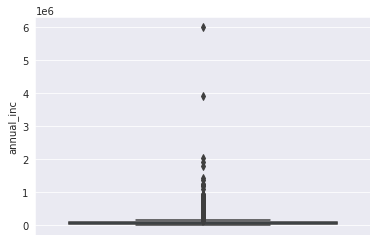

In [18]:
sns.boxplot( y="annual_inc",
            data=df_closed_loan)

In [19]:
p_25  = df_closed_loan.annual_inc.quantile(0.25)
p_90  = df_closed_loan.annual_inc.quantile(0.90)
df_normalised_loan = df_closed_loan[~(df_closed_loan['annual_inc'] >= p_90 ) ]


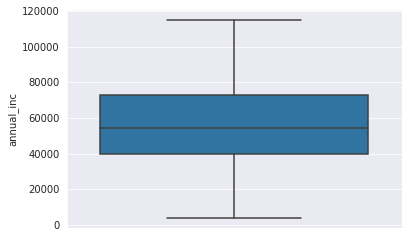

In [20]:

sns.boxplot( y="annual_inc",
            data=df_normalised_loan)

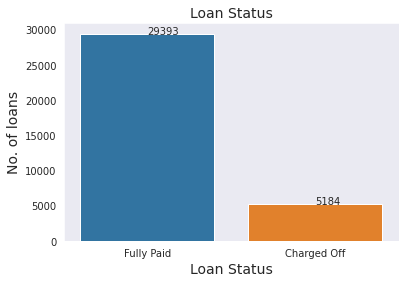

In [33]:

chrt = sns.countplot(x="loan_status",data=df_normalised_loan)
chrt.set_title('Loan Status',fontsize=14)
chrt.set_xlabel('Loan Status',fontsize=14)
chrt.set_ylabel('No. of loans',fontsize=14) 

# To show count of values above bars
df_cnt = df_normalised_loan['loan_status'].value_counts()
for i, v in df_cnt.reset_index().iterrows():
    chrt.text(i, v.loan_status + 0.3 , v.loan_status)


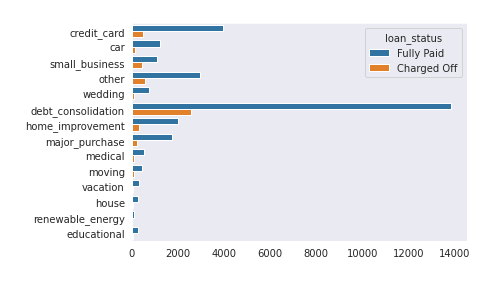

In [38]:
chrt = sns.countplot(y="purpose", data=df_normalised_loan, hue='loan_status')
chrt.set_title('Purpose Of Loan',fontsize=14,color='w')
chrt.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w')      
plt.show()

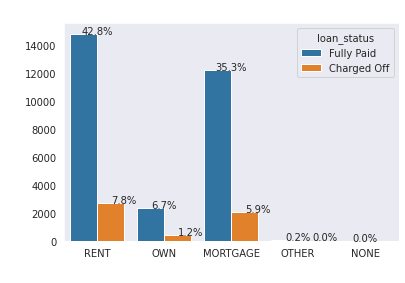

In [45]:
chrt = sns.countplot(x="home_ownership", data=df_normalised_loan, hue='loan_status')
chrt.set_title('Home Ownership',fontsize=14,color='w')
chrt.set_ylabel('Home Ownership',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

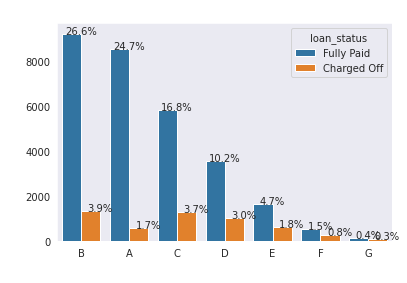

In [48]:
chrt = sns.countplot(x="grade", data=df_normalised_loan, hue='loan_status', order = df_normalised_loan['grade'].value_counts().index)
chrt.set_title('Loan Grade',fontsize=14,color='w')
chrt.set_ylabel('Loan Grade',fontsize=14,color = 'w')
chrt.set_xlabel('No. of Loans',fontsize=14,color = 'w') 

total = float(len(df_normalised_loan))
for p in chrt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    chrt.annotate(percentage, (x, y), ha='center')
plt.show()

<Figure size 864x576 with 0 Axes>

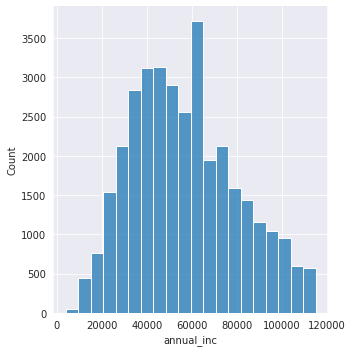

In [21]:
plt.figure(figsize= (12,8))
sns.displot(df_normalised_loan['annual_inc'], bins=20)
plt.show()

# Cleansing

In [22]:
df_loan.to_csv("output.csv") 